# **1. Знакомство с данными. Устранение дубликатов и работа с пропусками.**

In [161]:
# Импортируем необходимые библиотеки:
import pandas as pd
import json
from datetime import datetime
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objs as go
import plotly.express as px
from scipy import stats as st
from scipy.stats.mstats_basic import mannwhitneyu

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Тестовые задания/Uga Dooga/Копия us events ad_revenue filtered 03.02-07.02.csv')

In [3]:
df

,profile_id,os_version,device_manufacturer,device_model,device_type,device_locale,event_name,event_json,event_datetime,event_timestamp,event_receive_datetime,event_receive_timestamp,connection_type,operator_name,country_iso_code,city
0,JLjpGzDHBQm,11,Samsung,Galaxy Tab S6,tablet,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-04 20:02:28,1643994148,2022-02-06 17:58:19,1644159499,wifi,NaN,US,Norwalk
1,JLjpGzDHBQm,11,Samsung,Galaxy Tab S6,tablet,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-04 20:02:45,1643994165,2022-02-06 17:58:19,1644159499,wifi,NaN,US,Norwalk
2,JLkVacrzHY6,11,Google,Pixel 2,phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-05 17:53:05,1644072785,2022-02-06 16:59:29,1644155969,wifi,Verizon,US,Charlotte
3,JMC6wG3cX0f,10,Samsung,Galaxy S9,phone,en_US,c_ad_revenue,"{""ad_type"":""int"",""placement"":""next_level"",""vie...",2022-02-06 17:09:01,1644156541,2022-02-06 17:09:24,1644156564,wifi,T-Mobile,US,Cocoa
4,JLzWWTJfi1b,10,Samsung,Galaxy S9,phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-06 17:15:38,1644156938,2022-02-06 17:16:16,1644156976,cell,Verizon,US,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
860074,JLSQY2nx1NQ,12,Samsung,Galaxy S21 Ultra 5G,phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-03 08:29:27,1643866167,2022-02-03 08:29:37,1643866177,wifi,Verizon,US,Elmira
860075,JLKWwju79CA,12,Samsung,SM-G991U,phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-03 02:12:51,1643843571,2022-02-03 02:14:48,1643843688,cell,Verizon,US,Cherry Hill
860076,JLKWwju79CA,12,Samsung,SM-G991U,phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-03 02:13:06,1643843586,2022-02-03 02:14:48,1643843688,cell,Verizon,US,Cherry Hill
860077,JLKWwju79CA,12,Samsung,SM-G991U,phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-03 02:13:17,1643843597,2022-02-03 02:14:48,1643843688,cell,Verizon,US,Cherry Hill


In [4]:
# Для начала проверим наличие дублирующихся строк
df.duplicated().value_counts() # Дубликаты отсутствуют

False    860079
dtype: int64

In [5]:
df.info() # видим наличие пропусков в некоторых столбцах

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 860079 entries, 0 to 860078
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   profile_id               860065 non-null  object
 1   os_version               860079 non-null  object
 2   device_manufacturer      860079 non-null  object
 3   device_model             860079 non-null  object
 4   device_type              860079 non-null  object
 5   device_locale            860079 non-null  object
 6   event_name               860079 non-null  object
 7   event_json               860079 non-null  object
 8   event_datetime           860079 non-null  object
 9   event_timestamp          860079 non-null  int64 
 10  event_receive_datetime   860079 non-null  object
 11  event_receive_timestamp  860079 non-null  int64 
 12  connection_type          860079 non-null  object
 13  operator_name            841200 non-null  object
 14  country_iso_code    

In [6]:
df[df['profile_id'].isna()] # посмотрим, что за пропуски в столбце profile_id

,profile_id,os_version,device_manufacturer,device_model,device_type,device_locale,event_name,event_json,event_datetime,event_timestamp,event_receive_datetime,event_receive_timestamp,connection_type,operator_name,country_iso_code,city
191509,NaN,11,Samsung,Galaxy A10e,phone,en_US,c_ad_revenue,"{""ad_type"":""int"",""placement"":""next_level"",""vie...",2022-02-06 21:07:27,1644170847,2022-02-06 21:07:41,1644170861,wifi,AT&T,US,NaN
191510,NaN,11,Samsung,Galaxy A10e,phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-06 21:08:27,1644170907,2022-02-06 21:09:47,1644170987,wifi,AT&T,US,NaN
191511,NaN,11,Samsung,Galaxy A10e,phone,en_US,c_ad_revenue,"{""ad_type"":""int"",""placement"":""next_level"",""vie...",2022-02-06 21:12:38,1644171158,2022-02-06 21:13:25,1644171205,wifi,AT&T,US,NaN
191512,NaN,11,Samsung,Galaxy A10e,phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-06 21:13:41,1644171221,2022-02-06 21:16:10,1644171370,wifi,AT&T,US,NaN
191513,NaN,11,Samsung,Galaxy A10e,phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-06 21:14:12,1644171252,2022-02-06 21:16:10,1644171370,wifi,AT&T,US,NaN
191514,NaN,11,Samsung,Galaxy A10e,phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-06 21:15:28,1644171328,2022-02-06 21:16:10,1644171370,wifi,AT&T,US,NaN
191515,NaN,11,Samsung,Galaxy A10e,phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-06 21:17:22,1644171442,2022-02-06 21:17:42,1644171462,wifi,AT&T,US,NaN
191516,NaN,11,Samsung,Galaxy A10e,phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-06 21:17:36,1644171456,2022-02-06 21:17:42,1644171462,wifi,AT&T,US,NaN
191517,NaN,11,Samsung,Galaxy A10e,phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-06 21:18:08,1644171488,2022-02-06 21:18:42,1644171522,wifi,AT&T,US,NaN
191518,NaN,11,Samsung,Galaxy A10e,phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-06 21:18:23,1644171503,2022-02-06 21:18:42,1644171522,wifi,AT&T,US,NaN


In [7]:
# По строкам 191509-191521 вероятно пропущено одно и то же значение в столбце profile_id, но определить его не представляется возможным, т.к.
# в соседних строках (191508 и 191522) уже другой девайс и, вероятно, id.

In [8]:
# Заменим значения столбца для строк 191509-191521 на some_user

In [9]:
df.iloc[191509:191522]['profile_id'].fillna('some_user', inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [10]:
df.iloc[257211] # Строка 257210 по значению в столбце profile_id (JLtL8oZSdPP) скорее всего схожа со строкой 257211, т.к. значения в других столбцах совпадают.

profile_id                                                       JLtL8oZSdPP
os_version                                                                11
device_manufacturer                                                 Motorola
device_model                                                 moto g(8) power
device_type                                                            phone
device_locale                                                          en_US
event_name                                                      c_ad_revenue
event_json                 {"ad_type":"banner","placement":"","view_index...
event_datetime                                           2022-02-05 19:12:11
event_timestamp                                                   1644077531
event_receive_datetime                                   2022-02-05 19:12:51
event_receive_timestamp                                           1644077571
connection_type                                                         cell

In [11]:
df['profile_id'].fillna('JLtL8oZSdPP', inplace=True) # Заменим значения столбца profile_id для строки 257201 (единственная осталась с пропуском) на JLtL8oZSdPP.

In [12]:
df['profile_id'].isna().value_counts() # убедились, что пустых значений не осталось

False    860079
Name: profile_id, dtype: int64

In [13]:
# пропуски в столбце operator_name не трогаем, т.к. данный столбец использовать в данном случае не будем

In [14]:
# Посмотрим, что с пропусками в столбце city.

In [15]:
df[df['city'].isna()] # очень много пропусков - 323708

,profile_id,os_version,device_manufacturer,device_model,device_type,device_locale,event_name,event_json,event_datetime,event_timestamp,event_receive_datetime,event_receive_timestamp,connection_type,operator_name,country_iso_code,city
4,JLzWWTJfi1b,10,Samsung,Galaxy S9,phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-06 17:15:38,1644156938,2022-02-06 17:16:16,1644156976,cell,Verizon,US,NaN
5,JLzWWTJfi1b,10,Samsung,Galaxy S9,phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-06 17:15:53,1644156953,2022-02-06 17:16:16,1644156976,cell,Verizon,US,NaN
6,JLzWWTJfi1b,10,Samsung,Galaxy S9,phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-06 17:16:03,1644156963,2022-02-06 17:16:16,1644156976,cell,Verizon,US,NaN
7,JLzWWTJfi1b,10,Samsung,Galaxy S9,phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-06 17:16:23,1644156983,2022-02-06 17:17:11,1644157031,cell,Verizon,US,NaN
8,JLzWWTJfi1b,10,Samsung,Galaxy S9,phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-06 17:16:33,1644156993,2022-02-06 17:17:11,1644157031,cell,Verizon,US,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
858799,JL3whG60vtG,10,Samsung,Galaxy S9+,phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-04 04:15:26,1643937326,2022-02-04 04:15:58,1643937358,cell,AT&T,US,NaN
858800,JL3whG60vtG,10,Samsung,Galaxy S9+,phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-04 04:15:41,1643937341,2022-02-04 04:15:58,1643937358,cell,AT&T,US,NaN
858801,JL3whG60vtG,10,Samsung,Galaxy S9+,phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-04 04:15:56,1643937356,2022-02-04 04:15:58,1643937358,cell,AT&T,US,NaN
858802,JLka4P1hUft,10,Motorola,moto g(7) optimo maxx(XT1955DL),phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-04 05:07:56,1643940476,2022-02-04 05:08:44,1643940524,wifi,,US,NaN


In [16]:
# их заменить не представляется возможным, т.к. у каждого profile_id может быть несколько разных городов, удалять строки с пропусками также не имеем права - количество таких строк слишком большое

In [17]:
df['city'].fillna('unknown_city', inplace=True) # заменим пропуски в столбце на unknown_city

# **2. Создание столбцов тип рекламы и еСРМ.**

In [18]:
# Для начала получим необходимые данные из столбца event_json

In [19]:
# Для этого напишем 2 простенькие функции:

def ad_type(row):
  return json.loads(row['event_json']).get('ad_type') # переводим строку в json, получаем значение по ключу

def eCPM(row):
  return json.loads(row['event_json']).get('revenue') * 1000 # по аналогии переводим строку в json, получаем значение по ключу и умножаем на 1000 (т.к. еСРМ = revenue * 1000)

In [20]:
# Применяем функции, создаем новые столбцы - тип рекламы и eCPM:
df['ad_type'] = df.apply(ad_type, axis=1)
df['eCPM'] = df.apply(eCPM, axis=1)

In [21]:
df['ad_type'].value_counts() # у нас 3 типа рекламы. Видим, что наибольшее количество реклам типа banner, затем int, и самая малочисленная группа типа rv. Построим распределения для каждого из них. 

banner    815984
int        37613
rv          6482
Name: ad_type, dtype: int64

# **3. Распределение средних eCPM-ов юзеров.**


In [223]:
# выведем средние eCPM пользователей для типа рекламы banner
banner_ad = df[df['ad_type'] == 'banner'].groupby('profile_id')['eCPM'].mean().reset_index()
banner_ad

,profile_id,eCPM
0,JL00qCZH1HV,3.183940
1,JL015rw9vmN,1.160748
2,JL01aCdFTJy,0.740097
3,JL04ODuw9UP,0.213227
4,JL06OWhBYxn,0.468146
...,...,...
3504,JMLQTj4i34Y,0.178844
3505,JMLY5SO7wmn,0.306027
3506,JMLt54Rmui5,0.300763
3507,JMML6MrvRA4,0.419296


In [224]:
# выведем средние eCPM пользователей для типа рекламы int
int_ad = df[df['ad_type'] == 'int'].groupby('profile_id')['eCPM'].mean().reset_index()
int_ad

,profile_id,eCPM
0,JL015rw9vmN,21.983199
1,JL01aCdFTJy,11.965651
2,JL04ODuw9UP,23.160000
3,JL06b4k4ygp,7.327454
4,JL06eD8uPpv,44.820000
...,...,...
3958,JMLY5SO7wmn,30.015743
3959,JMLmauy744E,23.429988
3960,JMLt54Rmui5,23.706346
3961,JMML6MrvRA4,5.360404


In [225]:
# выведем средние eCPM пользователей для типа рекламы rv
rv_ad = df[df['ad_type'] == 'rv'].groupby('profile_id')['eCPM'].mean().reset_index()
rv_ad

,profile_id,eCPM
0,JL04ODuw9UP,80.640000
1,JL06eD8uPpv,211.700000
2,JL0GsLmgQqj,21.516378
3,JL0aZ4tP8jc,19.940048
4,JL0axMwodcw,211.700000
...,...,...
1319,JMJNoJcoBUf,103.769158
1320,JMJxPB37e2u,211.700000
1321,JMKCFREXspE,7.178189
1322,JMKEonE8xpy,28.240000


In [25]:
# визуализируем полученные метрики с использованием боксплотов
fig = go.Figure()
fig.add_trace(go.Box(y=banner_ad['eCPM'], name='Banner', marker_color='#316395'))
fig.add_trace(go.Box(y=int_ad['eCPM'], name='Int', marker_color='indianred'))
fig.add_trace(go.Box(y=rv_ad['eCPM'], name='Rv', marker_color='lightseagreen'))
fig.update_layout(title_text='Распределение средних eCPM пользователей по типам рекламы', xaxis_title='Тип рекламы', yaxis_title='Среднее еСРМ')

fig.show()

In [26]:
# Из графика видно, что наименьшая средняя еСРМ получается при типе рекламы Banner (сильно меньше других), тип рекламы Rv предоставляет самую большую среднюю еСРМ с пользователя, самую большую медианную, самую высокую минимальную, 
# а также наибольший разброс по значениям (расстояние между 1 и 3 квантилем больше, чем при других типах рекламы.)

In [ ]:
# На графике представлены выбросы для каждого типа рекламы.
# Прежде чем проверим являются ли отличия выборок статистически значимыми, избавимся от выбросов и посмотрим распределение.
# В данном случае будем сравнивать типы int и rv (видно, что banner сильно отличается).

In [226]:
len(int_ad[int_ad['eCPM'] < 113.8477]) # размер выборки 1 (исключили выбросы)

3602

In [227]:
len(rv_ad[rv_ad['eCPM'] < 202.5554]) # размер выборки 2 (исключили выбросы)

1141

In [ ]:
# Посмотрим распределение:

(array([ 16.,  57., 114., 328., 102.,  63.,  48.,  32.,  35., 151.,  25.,
         20.,  17.,  14.,  14.,   7.,  22.,  10.,  21.,   9.,   7.,   7.,
         13.,   3.,   6.]),
 array([  0.22322168,   8.31650604,  16.4097904 ,  24.50307476,
         32.59635912,  40.68964348,  48.78292784,  56.8762122 ,
         64.96949656,  73.06278092,  81.15606527,  89.24934963,
         97.34263399, 105.43591835, 113.52920271, 121.62248707,
        129.71577143, 137.80905579, 145.90234015, 153.9956245 ,
        162.08890886, 170.18219322, 178.27547758, 186.36876194,
        194.4620463 , 202.55533066]),
 <a list of 25 Patch objects>)

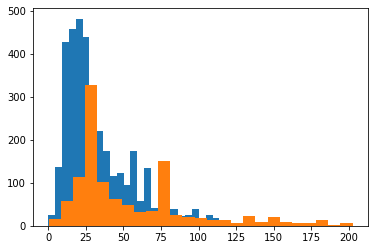

In [228]:
plt.hist(int_ad[int_ad['eCPM'] < 113.8477]['eCPM'],bins=25)
plt.hist(rv_ad[rv_ad['eCPM'] < 202.5554]['eCPM'],bins=25)

In [ ]:
# Распределение не нормальное, выборки независимы, будем использовать критерий Манна-Уитни.

In [231]:
# Теперь проверим различия выборок на статистическую значимость. Альфа возьмем 1%.
# Нулевая гипотеза - средняя еСРМ пользователей для рекламы типов int и rv одинаковая.
# Альтернативная гипотеза - средняя еСРМ пользователей для рекламы тип int и rv различается.
alpha = 0.01

result = st.mannwhitneyu(int_ad[int_ad['eCPM'] < 113.8477]['eCPM'], rv_ad[rv_ad['eCPM'] < 202.5554]['eCPM'])
print('P-value:',result.pvalue)

if (result.pvalue < alpha):
    print('Отвергаем нулевую гипотезу, средняя еСРМ пользователей для рекламы тип int и rv различается.')
else:
    print('Не отвергаем нулевую гипотезу')

P-value: 5.2349054557874126e-82
Отвергаем нулевую гипотезу, средняя еСРМ пользователей для рекламы тип int и rv различается.


In [31]:
# Таким образом, убедились, что различия выборок средних еСРМ пользователей по типам реклам int и rv не случайны.

# **4. Распределение eCPM-ов по городам, версиям ОС.**

In [32]:
# Для начала посмотрим средние еСРМ по городам и по типам рекламы
city_eCPM = df.groupby(['city','ad_type'])['eCPM'].mean().reset_index()
city_eCPM

,city,ad_type,eCPM
0,Aberdeen,banner,0.321518
1,Aberdeen,int,13.583285
2,Aberdeen,rv,21.516378
3,Abilene,banner,0.941283
4,Abilene,int,50.301282
...,...,...,...
2177,Zanesville,int,19.668018
2178,Zanesville,rv,45.416136
2179,unknown_city,banner,0.762472
2180,unknown_city,int,36.203917


In [33]:
# построим распределение средних eCPM по городам по типам рекламы
fig = px.bar(city_eCPM , x=city_eCPM['city'], y=city_eCPM['eCPM'], text_auto=True, labels={'city':'Город','eCPM':'Средний eCPM'}, color=city_eCPM['ad_type']).update_xaxes(categoryorder='total descending')
fig.update_layout(title_text='Распределение средних eCPM по городам по типам рекламы')
fig.show()

In [34]:
# Из графика видим, что максимальное среднее еСРМ для типа рекламы rv показывает East Peoria, также можно выделить Norwood. Минимальное значение по городу Utica.
# Для типа int - Madissonville, также можно выделить La Crosse. Минимальное значение по городу Lincoln City.
# Для типа banner лидирует La Crosse, еще можно выделить Mountain View. Минимальное значение для Canonsburg.
# Также из графика видно, что в основном по городам лидирует средний еСРМ от типа рекламы rv, при этом есть ряд населенных пунктов, где еСРМ от данного типа рекламы вообще отсутствует как класс.
# еСРМ от типа int присутствует в большинстве городов по сравнению с другими типами рекламы.
# Максимальный общий средний еСРМ от всех типов рекламы показал город East Peoria.

In [35]:
# визуализируем полученную метрику с использованием боксплотов
fig = go.Figure()
fig.add_trace(go.Box(y=city_eCPM[city_eCPM['ad_type'] == 'banner']['eCPM'], name='Banner', marker_color='#316395'))
fig.add_trace(go.Box(y=city_eCPM[city_eCPM['ad_type'] == 'int']['eCPM'], name='Int', marker_color='indianred'))
fig.add_trace(go.Box(y=city_eCPM[city_eCPM['ad_type'] == 'rv']['eCPM'], name='Rv', marker_color='lightseagreen'))
fig.update_layout(title_text='Распределение eCPM (средних по городам) по типам рекламы', xaxis_title='Тип рекламы', yaxis_title='Среднее еСРМ')

fig.show()

In [36]:
# Из графика видно, что наименьшая средняя по городам еСРМ получается при типе рекламе Banner, тип рекламы Rv предоставляет самую большую среднюю еСРМ по городам, самую большую медианную, самую высокую минимальную, 
# а также наибольший разброс по значениям (расстояние между 1 и 3 квантилем больше, чем при других типах рекламы.)

In [ ]:
# На графике представлены выбросы для каждого типа рекламы.
# Прежде чем проверим являются ли отличия выборок статистически значимыми, избавимся от выбросов и посмотрим распределение.
# В данном случае будем сравнивать типы int и rv (видно, что banner сильно отличается).

In [232]:
# избавимся от выбросов:
c_eCPM_int = city_eCPM[(city_eCPM['ad_type'] == 'int') & (city_eCPM['eCPM'] < 95.74486)]['eCPM']
c_eCPM_rv = city_eCPM[(city_eCPM['ad_type'] == 'rv') & (city_eCPM['eCPM'] < 215.2284)]['eCPM']

In [38]:
len(c_eCPM_int) # размер выборки 1

795

In [39]:
len(c_eCPM_rv) # размер выборки 2

443

In [ ]:
# Посмотрим распределение:

(array([ 8., 25., 92., 37., 29., 27., 28., 20., 15., 43.,  8.,  9., 14.,
        10.,  6.,  5., 10.,  5.,  3.,  7.,  0.,  8.,  0.,  1., 33.]),
 array([  3.33955084,  11.81510219,  20.29065354,  28.76620489,
         37.24175624,  45.71730759,  54.19285894,  62.66841028,
         71.14396163,  79.61951298,  88.09506433,  96.57061568,
        105.04616703, 113.52171837, 121.99726972, 130.47282107,
        138.94837242, 147.42392377, 155.89947512, 164.37502646,
        172.85057781, 181.32612916, 189.80168051, 198.27723186,
        206.75278321, 215.22833455]),
 <a list of 25 Patch objects>)

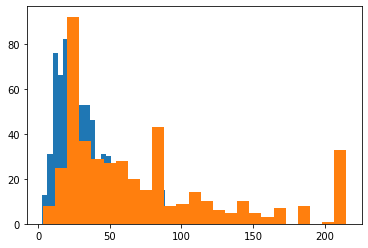

In [166]:
plt.hist(c_eCPM_int,bins=25)
plt.hist(c_eCPM_rv,bins=25)

In [ ]:
# Видим, что распределение у нас не нормальное, выборки не зависимы.
# Будем использовать критерий Манна-Уитни.

In [233]:
# Альфа возьмем 1%.
# Нулевая гипотеза - средняя еСРМ пользователей для рекламы типов int и rv одинаковая.
# Альтернативная гипотеза - средняя еСРМ пользователей для рекламы тип int и rv различается.
alpha = 0.01

result = mannwhitneyu(c_eCPM_int, c_eCPM_rv)
print('P-value:',result.pvalue)

if (result.pvalue < alpha):
    print('Отвергаем нулевую гипотезу, средняя еСРМ пользователей для рекламы тип int и rv различается.')
else:
    print('Не отвергаем нулевую гипотезу')

P-value: 1.3139077309020424e-43
Отвергаем нулевую гипотезу, средняя еСРМ пользователей для рекламы тип int и rv различается.


In [41]:
# Теперь посмотрим средние еСРМ по ОС и по типам рекламы
os_eCPM = df.groupby(['os_version', 'ad_type'])['eCPM'].mean().reset_index()
os_eCPM

,os_version,ad_type,eCPM
0,10,banner,0.591274
1,10,int,31.216643
2,10,rv,53.336882
3,11,banner,0.592766
4,11,int,33.468471
5,11,rv,53.378872
6,12,banner,0.936871
7,12,int,42.391070
8,12,rv,79.568911
9,5.0.2,banner,0.198288


In [42]:
# построим распределение средних eCPM по версиям по типам рекламы
fig = px.bar(os_eCPM , x=os_eCPM['os_version'], y=os_eCPM['eCPM'], text_auto=True, labels={'os_version':'Версия','eCPM':'Средний eCPM'}, color=os_eCPM['ad_type']).update_xaxes(categoryorder='total ascending')
fig.update_layout(title_text='Распределение средних eCPM по версиям по типам рекламы')
fig.show()

In [43]:
# Из графика видно, что минимальные средние значения все типы рекламы показали на версии 7.1.2. При этом тип rv вообще не показал никакого значения. Можно сделать вывод, что данный тип рекламы на данной версии не использовался.
# Максимальные значения типы рекламы bannner и int показали на 12 версии, показатели rv здесь немного не дотянули до максимума. Максимум тип rv показал на 7.0 версии, здесь достаточно высокое значение показал и тип int.
# Также видим, что начиная с 9 версии и по 12 (последняя на данный момент) все типы рекламы показывали рост. При чем самый существенный рост на данном отрезке оказался при переходе с 11 на 12 версию.
# При переходе с версии 6.0.1 на версию 7.0 максимальный прирост средних еСРМ по рекламам всех типов (7.0 - удачная версия!), учитывая, что на версии 6.0.1 отсутствуют средниее еСРМ по типу banner в принципе.

In [44]:
# визуализируем полученную метрику с использованием боксплотов
fig = go.Figure()
fig.add_trace(go.Box(y=os_eCPM[os_eCPM['ad_type'] == 'banner']['eCPM'], name='Banner', marker_color='#316395'))
fig.add_trace(go.Box(y=os_eCPM[os_eCPM['ad_type'] == 'int']['eCPM'], name='Int', marker_color='indianred'))
fig.add_trace(go.Box(y=os_eCPM[os_eCPM['ad_type'] == 'rv']['eCPM'], name='Rv', marker_color='lightseagreen'))
fig.update_layout(title_text='Распределение eCPM (средних по версиям) по типам рекламы', xaxis_title='Тип рекламы', yaxis_title='Среднее еСРМ')

fig.show()

In [45]:
# Из графика видно, что наименьшая средняя по городам еСРМ получается при типе рекламе Banner, тип рекламы Rv предоставляет самую большую среднюю еСРМ по версиям, самую большую медианную,  
# а также наибольший разброс по значениям (расстояние между 1 и 3 квантилем больше, чем при других типах рекламы.) Самую высокую минимальную еСРМ по версиям показала реклама типа int.
# На графике отсутствуют выбросы для всех типов рекламы.

In [ ]:
# В данном случае будем сравнивать типы int и rv (видно, что banner сильно отличается).
# Проверим являются ли отличия выборок статистически значимыми, посмотрим их размеры:

In [175]:
len(os_eCPM[os_eCPM['ad_type'] == 'int']['eCPM'])

11

In [169]:
len(os_eCPM[os_eCPM['ad_type'] == 'rv']['eCPM'])

10

In [235]:
# Видим, что размеры выборок невелики. Используем бутстрап.
int_ad = [] 
rv_ad = []
for i in range(1000): # делаем 7-строчные срезы из каждой выборки, считаем среднее по ним и заносим в созданные списки (так 1000 раз)
  int_mean = os_eCPM[os_eCPM['ad_type'] == 'int']['eCPM'].sample(n=7, replace=True).mean()
  rv_mean = os_eCPM[os_eCPM['ad_type'] == 'rv']['eCPM'].sample(n=7, replace=True).mean()
  int_ad.append(int_mean)
  rv_ad.append(rv_mean)

In [ ]:
# Посмотрим распределение полученных выборок:

(array([  1.,   1.,   7.,   6.,  21.,  37.,  48.,  73.,  95., 108., 110.,
        100.,  80.,  88.,  69.,  61.,  41.,  17.,  12.,   8.,   5.,   6.,
          2.,   3.,   1.]),
 array([16.93149317, 19.28786711, 21.64424106, 24.000615  , 26.35698894,
        28.71336289, 31.06973683, 33.42611078, 35.78248472, 38.13885866,
        40.49523261, 42.85160655, 45.2079805 , 47.56435444, 49.92072838,
        52.27710233, 54.63347627, 56.98985021, 59.34622416, 61.7025981 ,
        64.05897205, 66.41534599, 68.77171993, 71.12809388, 73.48446782,
        75.84084176]),
 <a list of 25 Patch objects>)

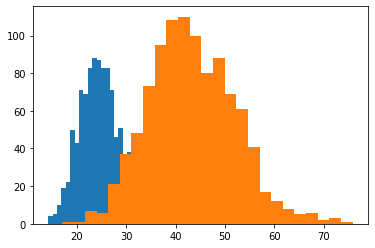

In [188]:
plt.hist(int_ad,bins=25)
plt.hist(rv_ad,bins=25)

In [ ]:
# Видим, что распределение у нас нормальное, выборки не связаны.
# Будем использовать тест Стьюдента с параметром equal_var=False (при этом параметре он становится критерием Уэлча, есть мнение (http://daniellakens.blogspot.com/2015/01/always-use-welchs-t-test-instead-of.html), что использование этого критерия всегда предпочтительнее, будем придерживаться этого мнения).

In [236]:
# Теперь проверим различия выборок на статистическую значимость. Альфа возьмем 1%.
# Нулевая гипотеза - средняя еСРМ по версиям для рекламы тип int и rv одинаковая.
# Альтернативная гипотеза - средняя еСРМ по версиям для рекламы тип int и rv различается.
alpha = 0.01

result = st.ttest_ind(int_ad, rv_ad, equal_var=False)
print('P-value:',result.pvalue)

if (result.pvalue < alpha):
    print('Отвергаем нулевую гипотезу, средняя еСРМ по версиям для рекламы тип int и rv различается.')
else:
    print('Не отвергаем нулевую гипотезу')

P-value: 0.0
Отвергаем нулевую гипотезу, средняя еСРМ по версиям для рекламы тип int и rv различается.


# **5.Распределение доходов по городам, версиям ОС.**

In [47]:
revenue_city = df.groupby(['city','ad_type'])['eCPM'].sum().reset_index() # группируем по городу и типу рекламы, суммируем, сбрасываем индекс
revenue_city['revenue'] = revenue_city['eCPM'] / 1000 # делим на 1000 (т.к. еСРМ = доход * 1000)
revenue_city = revenue_city[revenue_city['city'] != 'unknown_city'] # исключим для данного исследования неизвестные города, т.к. суммарный доход от них искажает общую картину
revenue_city

,city,ad_type,eCPM,revenue
0,Aberdeen,banner,30.865747,0.030866
1,Aberdeen,int,81.499710,0.081500
2,Aberdeen,rv,21.516378,0.021516
3,Abilene,banner,43.298997,0.043299
4,Abilene,int,402.410258,0.402410
...,...,...,...,...
2174,Yuma,banner,18.585339,0.018585
2175,Yuma,int,53.126153,0.053126
2176,Zanesville,banner,167.651393,0.167651
2177,Zanesville,int,1081.741017,1.081741


In [48]:
# построим распределение доходов по городам по типам рекламы
fig = px.bar(revenue_city , x=revenue_city['city'], y=revenue_city['revenue'], text_auto=True, labels={'city':'Город','revenue':'Доход'}, color=revenue_city['ad_type']).update_xaxes(categoryorder='total descending')
fig.update_layout(title_text='Распределение доходов по городам по типам рекламы')
fig.show()

In [49]:
# Из графика видим, что максимальный доход для типа рекламы rv показывает Houston, также можно выделить Cleveland, New York, Minneapolis, Oklahoma City. Минимальное значение по городу Fort Walton Beach.
# Для типа int - New York, также можно выделить Indianapolis, Cleveland. Минимальное значение по городу Danville.
# для типа banner лидирует New York, еще можно выделить Indianapolis. Минимальное значение для Anderson.
# Также из графика видно, что в основном по городам лидирует тип рекламы int. Есть ряд населенных пунктов, где доходы от типа рекламы rv отсутствуют как класс.
# Доход от типа int присутствует в большинстве городов по сравнению с другими типами рекламы.
# По суммарному доходу от всех типов реклам наилучшие значения показал New York.

In [50]:
# визуализируем полученную метрику с использованием боксплотов
fig = go.Figure()
fig.add_trace(go.Box(y=revenue_city[revenue_city['ad_type'] == 'banner']['revenue'], name='Banner', marker_color='#316395'))
fig.add_trace(go.Box(y=revenue_city[revenue_city['ad_type'] == 'int']['revenue'], name='Int', marker_color='indianred'))
fig.add_trace(go.Box(y=revenue_city[revenue_city['ad_type'] == 'rv']['revenue'], name='Rv', marker_color='lightseagreen'))
fig.update_layout(title_text='Распределение доходов (суммарно по городам) по типам рекламы', xaxis_title='Тип рекламы', yaxis_title='Суммарные доходы')

fig.show()

In [51]:
# На данном графике все уже не так однозначно. Избавимся от выбросов и сравним все 3 типа рекламы на статистическую значимость между собой.

In [52]:
# избавимся от выбросов: 
c_r_banner = revenue_city[(revenue_city['ad_type'] == 'banner') & (revenue_city['revenue'] < 0.8460808)]['revenue']
c_r_int = revenue_city[(revenue_city['ad_type'] == 'int') & (revenue_city['revenue'] < 2.03725)]['revenue']
c_r_rv = revenue_city[(revenue_city['ad_type'] == 'rv') & (revenue_city['revenue'] < 1.491434)]['revenue']

In [ ]:
# размеры выборок:

In [53]:
len(c_r_banner)

761

In [54]:
len(c_r_int)

783

In [55]:
len(c_r_rv)

410

(array([98., 69., 30., 50., 22., 11., 15., 18., 10.,  8., 11.,  8.,  6.,
         4.,  6.,  8.,  6.,  4.,  4.,  3.,  2.,  3.,  6.,  3.,  5.]),
 array([0.00407452, 0.06356887, 0.12306323, 0.18255758, 0.24205194,
        0.30154629, 0.36104065, 0.420535  , 0.48002936, 0.53952371,
        0.59901807, 0.65851242, 0.71800678, 0.77750113, 0.83699549,
        0.89648985, 0.9559842 , 1.01547856, 1.07497291, 1.13446727,
        1.19396162, 1.25345598, 1.31295033, 1.37244469, 1.43193904,
        1.4914334 ]),
 <a list of 25 Patch objects>)

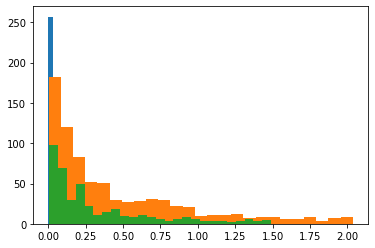

In [196]:
plt.hist(c_r_banner,bins=25)
plt.hist(c_r_int,bins=25)
plt.hist(c_r_rv,bins=25)

In [ ]:
# распределение не нормальное, будем использовать тест Манна-Уитни

In [237]:
# Теперь проверим различия выборок на статистическую значимость. Альфа возьмем 1%.
alpha = 0.01

In [238]:
# Нулевая гипотеза - суммарный доход по городам для реклам типов banner и int одинаков.
# Альтернативная гипотеза - суммарный доход по городам для реклам типов banner и int различается.

result = st.mannwhitneyu(c_r_banner, c_r_int)
print('P-value:',result.pvalue)

if (result.pvalue < alpha):
    print('Отвергаем нулевую гипотезу, суммарный доход по городам для реклам типов banner и int различается.')
else:
    print('Не отвергаем нулевую гипотезу')

P-value: 3.6224860834104676e-54
Отвергаем нулевую гипотезу, суммарный доход по городам для реклам типов banner и int различается.


In [239]:
# Нулевая гипотеза - суммарный доход по городам для реклам типов banner и rv одинаков.
# Альтернативная гипотеза - суммарный доход по городам для реклам типов banner и rv различается.

result = st.mannwhitneyu(c_r_banner, c_r_rv)
print('P-value:',result.pvalue)

if (result.pvalue < alpha):
    print('Отвергаем нулевую гипотезу, суммарный доход по городам для реклам типов banner и rv различается.')
else:
    print('Не отвергаем нулевую гипотезу')

P-value: 5.212043737244646e-23
Отвергаем нулевую гипотезу, суммарный доход по городам для реклам типов banner и rv различается.


In [240]:
# Нулевая гипотеза - суммарный доход по городам для реклам типов int и rv одинаков.
# Альтернативная гипотеза - суммарный доход по городам для реклам типов int и rv различается.

result = st.mannwhitneyu(c_r_int, c_r_rv)
print('P-value:',result.pvalue)

if (result.pvalue < alpha):
    print('Отвергаем нулевую гипотезу, суммарный доход по городам для реклам типов int и rv различается.')
else:
    print('Не отвергаем нулевую гипотезу')

P-value: 2.8574955017014612e-05
Отвергаем нулевую гипотезу, суммарный доход по городам для реклам типов int и rv различается.


In [60]:
# Теперь посмотрим суммарные доходы по типам рекламы для разных версий.

In [61]:
revenue_os = df.groupby(['os_version','ad_type'])['eCPM'].sum().reset_index() # группируем по версии и типу рекламы, суммируем, сбрасываем индекс
revenue_os['revenue'] = revenue_os['eCPM'] / 1000 # делим на 1000 (т.к. еСРМ = доход * 1000)
revenue_os

,os_version,ad_type,eCPM,revenue
0,10,banner,85002.787602,85.002788
1,10,int,191795.052481,191.795052
2,10,rv,51470.090725,51.470091
3,11,banner,116298.348409,116.298348
4,11,int,363634.932340,363.634932
5,11,rv,107291.532936,107.291533
6,12,banner,363488.994005,363.488994
7,12,int,704497.186955,704.497187
8,12,rv,237592.766784,237.592767
9,5.0.2,banner,135.827302,0.135827


In [62]:
# построим распределение доходов по версиям по типам рекламы
fig = px.bar(revenue_os , x=revenue_os['os_version'], y=revenue_os['revenue'], text_auto=True, labels={'os_version':'Версия','revenue':'Доход'}, color=revenue_os['ad_type']).update_xaxes(categoryorder='total ascending')
fig.update_layout(title_text='Распределение доходов по версиям по типам рекламы')
fig.show()

In [63]:
# Из графика видно, что на версии 7.1.2 доходов от типа рекламы rv нет совсем. На версии 7.1.1 доход минимальный. Также очень маленький доход на версиях 5.0.2, 6.0.1 (ранние версии).
# Существенный рост доходов для типа рекламы rv наблюдается с 9 по 12 версии, максимальный прирост на 12 (последняя).

# Для типа int минимальный доход наблюдается на версии 5.0.2 (первая версия). Максимальный на 12 версии (последняя).
# Существенный рост доходов для типа рекламы int наблюдается с 9 по 12 версии, максимальный прирост на 12 (последняя).

# Для типа banner минимальный доход наблюдается на версии 5.0.2 (первая версия), также маленький доход на версии 6.0.1 (вторая версия). Максимальный - на 12 версии (последняя).
# Начиная с версии 8.0.0 наблюдается рост доходов, наиболее существенный с 9 по 12 версию. Максимальный рост на 12 версии (последняя).

# Таким образом, максимальный рост все типы рекламы показывали с 9 по 12 версии. На 12 (последней) версии все типы рекламы имели максимальный доход.
# Наибольшие доходы на всех версиях показала реклама типа int. Наименьшие на всех версиях - реклама типа rv (за исключением версии 7.0, здесь она на 2 месте). 

In [64]:
# визуализируем полученную метрику с использованием боксплотов
fig = go.Figure()
fig.add_trace(go.Box(y=revenue_os[revenue_os['ad_type'] == 'banner']['revenue'], name='Banner', marker_color='#316395'))
fig.add_trace(go.Box(y=revenue_os[revenue_os['ad_type'] == 'int']['revenue'], name='Int', marker_color='indianred'))
fig.add_trace(go.Box(y=revenue_os[revenue_os['ad_type'] == 'rv']['revenue'], name='Rv', marker_color='lightseagreen'))
fig.update_layout(title_text='Распределение доходов (суммарно по версиям) по типам рекламы', xaxis_title='Тип рекламы', yaxis_title='Суммарные доходы')

fig.show()

In [65]:
# На данном графике также все не однозначно. Видим по 1 выбросу для каждого типа.
# Медиана для каждого типа расположена максимально близко к 1 квантилю.
# Максимальные значения показывает тип рекламы int.
# Избавимся от выбросов и сравним banner и rv на статистическую значимость между собой (видим, что int существенно отличается).

In [66]:
# избавимся от выбросов: 
os_r_banner = revenue_os[(revenue_os['ad_type'] == 'banner') & (revenue_os['revenue'] < 116.2984)]['revenue']
os_r_rv = revenue_os[(revenue_os['ad_type'] == 'rv') & (revenue_os['revenue'] < 107.2916)]['revenue']

In [ ]:
# размеры выборок невелики:

In [67]:
len(os_r_banner)

10

In [69]:
len(os_r_rv)

9

In [208]:
os_r_banner

0      85.002788
3     116.298348
9       0.135827
12      0.166939
15      1.065803
18      0.300135
21      0.252216
23      2.804952
26      2.847789
29     34.820249
Name: revenue, dtype: float64

In [241]:
# Используем бутстрап.
banner_ad = []
rv_ad = []
for i in range(1000):
  banner_mean = os_r_banner.sample(n=8, replace=True).mean()
  rv_mean = os_r_rv.sample(n=8, replace=True).mean()
  banner_ad.append(banner_mean)
  rv_ad.append(rv_mean)

(array([51., 61., 90., 73., 45., 89., 98., 97., 59., 38., 90., 40., 51.,
        27., 25., 18.,  8., 20.,  4.,  7.,  1.,  0.,  4.,  3.,  1.]),
 array([ 0.18761278,  2.85240805,  5.51720332,  8.18199859, 10.84679386,
        13.51158913, 16.1763844 , 18.84117968, 21.50597495, 24.17077022,
        26.83556549, 29.50036076, 32.16515603, 34.8299513 , 37.49474658,
        40.15954185, 42.82433712, 45.48913239, 48.15392766, 50.81872293,
        53.48351821, 56.14831348, 58.81310875, 61.47790402, 64.14269929,
        66.80749456]),
 <a list of 25 Patch objects>)

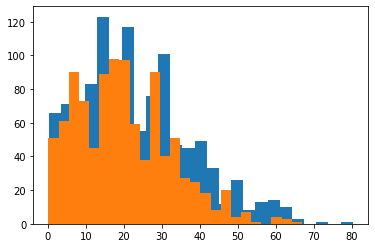

In [242]:
plt.hist(banner_ad,bins=25)
plt.hist(rv_ad,bins=25)

In [ ]:
# Распределение не нормальное, используем критерий Манна-Уитни

In [243]:
# Теперь проверим различия выборок на статистическую значимость. Альфа возьмем 1%.
alpha = 0.01

In [244]:
# Нулевая гипотеза - суммарный доход по версиям для реклам типов banner и rv одинаков.
# Альтернативная гипотеза - суммарный доход по версиям для реклам типов banner и rv различается.

result = st.mannwhitneyu(banner_ad, rv_ad)
print('P-value:',result.pvalue)

if (result.pvalue < alpha):
    print('Отвергаем нулевую гипотезу, суммарный доход по версиям для реклам типов banner и rv различается.')
else:
    print('Не отвергаем нулевую гипотезу')

P-value: 6.271636956863693e-10
Отвергаем нулевую гипотезу, суммарный доход по версиям для реклам типов banner и rv различается.


# **Выводы по исследованию.**

Проведенное исследование позволяет сделать следующие **выводы**:

Наибольшее количество реклам представлено типом banner - 815984, реклам типа int - 37613, самое меньшее количество реклам типа rv - 6482.

**Средние еСРМ пользователей:**

Наименьшие средние значения еСРМ показал тип рекламы Banner, тип рекламы Rv показал самые высокие средние значения еСРМ с пользователя. Различия в выборках данных по типам рекламы Rv и int статистически значимы. Более подробная информация представлена в отчете.

**Средние еСРМ по городам:**

Наименьшее среднее по городам еСРМ приходится на тип рекламы Banner, тип рекламы Rv предоставляет самую большую среднюю еСРМ по городам.
Среднее еСРМ от типа int присутствует в большинстве городов по сравнению с другими типами рекламы (т.е. int есть практически в каждом городе, в отличие от других типов рекламы).
Также можно выделить, что в основном по городам лидирует средний еСРМ от типа рекламы rv, при этом есть ряд населенных пунктов, где еСРМ от данного типа рекламы вообще отсутствует как класс.
Различия в выборках данных по типам рекламы Rv и int статистически значимы. Более подробная информация представлена в отчете.

**Средние еСРМ по версиям:**

Наименьшая средняя по версиям еСРМ получается при типе рекламы Banner, тип рекламы Rv предоставляет самую большую среднюю еСРМ по версиям.
Различия в выборках данных по типам рекламы Rv и int статистически значимы. Более подробная информация представлена в отчете.

**Доход по городам:**

В основном по городам лидирует тип рекламы int. Есть ряд населенных пунктов, где доходы от типа рекламы rv отсутствуют как класс.
Доход от типа int присутствует в большинстве городов по сравнению с другими типами рекламы.
Различия в выборках данных по типам реклам статистически значимы. Более подробная информация представлена в отчете.

**Доход по версиям:**

Наибольшие доходы на всех версиях показала реклама типа int. Наименьшие на всех версиях - реклама типа rv (за исключением версии 7.0).
Различия в выборках данных по типам реклам статистически значимы. Более подробная информация представлена в отчете.

**Дополнительно:**

Ниже приведены дополниельные задания и исследования.

# **Дополнительные задания (по желанию).**

**Какой процент доходов содержит информацию о городе юзера**

In [75]:
# Посмотрим, какой процент доходов содержит информацию о городе юзера.
# Таким образом необходимо посчитать процент доходов без учета unknown_city.
df['city'].value_counts()

unknown_city     323708
New York          17584
Minneapolis       12980
Houston           10137
Springfield       10135
                  ...  
Picayune              1
Chambersburg          1
Morehead City         1
Bellflower            1
Swedesboro            1
Name: city, Length: 921, dtype: int64

In [76]:
# Для начала посчитаем суммарные доходы по всем городам:
revenue_cities = df['eCPM'].sum() / 1000
revenue_cities

2390.7986603435606

In [77]:
# Теперь посмотрим суммарные доходы по известным городам:
known_revenue_cities = df[df['city'] != 'unknown_city']['eCPM'].sum() / 1000
known_revenue_cities

1519.9525969609952

In [78]:
print(f"Информацию о городе юзера содержит {round(known_revenue_cities * 100 / revenue_cities)} % доходов")

Информацию о городе юзера содержит 64 % доходов


**Зависит ли eCPM от времени дня**

In [79]:
df['event_datetime'] = pd.to_datetime(df['event_datetime']) # переведем столбец в тип datetime

In [80]:
def dt_to_hour(row):
  return row['event_datetime'].hour # функция возвращает значение часа из указанной ячейки

In [81]:
df['hour'] = df.apply(dt_to_hour, axis=1) # создаем новый столбец hour, куда записывается час из столбца event_datetime

In [82]:
eCPM_by_time = df.groupby('hour')['eCPM'].mean() # сгруппировали по часу и вывели средний еСРМ
eCPM_by_time # по индексу 0 располагается средний еСРМ в промежутке с 00 (полночь) до 01 (час ночи) и далее по аналогии

hour
0     2.675560
1     2.758656
2     2.708332
3     2.718954
4     2.648077
5     2.942329
6     2.930231
7     2.675508
8     3.048182
9     3.173506
10    2.431129
11    2.750190
12    2.759900
13    3.017668
14    2.764139
15    2.441121
16    2.966535
17    3.232273
18    3.088187
19    2.905579
20    2.496635
21    2.663852
22    2.529223
23    2.571077
Name: eCPM, dtype: float64

In [83]:
# Таким образом видим, что наибольшее значение еСРМ принимает в промежутках с 8 до 9, с 9 до 10, с 13 до 14, с 17 до 18, с 18 до 19
# Наименьшие значения в промежутках с 10 до 11, с 15 до 16, с 20 до 21, с 22 до 23.

# **Дополнительно. Главные киты и один малек.**

In [84]:
# посмотрим средние еСРМ по юзерам и по типам рекламы
user_eCPM = df.groupby(['profile_id','ad_type'])['eCPM'].mean().reset_index()
user_eCPM

,profile_id,ad_type,eCPM
0,JL00qCZH1HV,banner,3.183940
1,JL015rw9vmN,banner,1.160748
2,JL015rw9vmN,int,21.983199
3,JL01aCdFTJy,banner,0.740097
4,JL01aCdFTJy,int,11.965651
...,...,...,...
8791,JMLt54Rmui5,int,23.706346
8792,JMML6MrvRA4,banner,0.419296
8793,JMML6MrvRA4,int,5.360404
8794,some_user,banner,0.464518


In [85]:
# построим распределение средних eCPM пользователей по типам рекламы
fig = px.bar(user_eCPM , x=user_eCPM['profile_id'], y=user_eCPM['eCPM'], text_auto=True, labels={'profile_id':'ID пользователя','eCPM':'Средний eCPM'}, color=user_eCPM['ad_type']).update_xaxes(categoryorder='max descending')
fig.update_layout(title_text='Распределение средних eCPM пользователей по типам рекламы')
fig.show()

In [86]:
# Из данного графика видим, что наибольший средний еСРМ от большинства пользователей приносит тип рекламы rv. 
# При этом по многим пользователям вообще отсутствует средний еСРМ от данного типа рекламы, в этом случае основной еСРМ у них от рекламы типа int.
# eCPM от типа рекламы banner является наименьшим для большинства пользователей.
# У многих пользователей еСРМ идет только от рекламы типа int.
# Наибольший средний еСРМ от типа rv наблюдается у пользователя JLtY7hvRXO3. Наименьший - у пользователя JL3xP8xM4Xf.
# Наибольший средний еСРМ от типа int наблюдается у пользователя JLs8H01mzVe. Наименьший - у пользователя JL3xP8xM4Xf.
# Наибольший средний еСРМ от типа banner наблюдается у пользователя JMALx7q70qG, совсем рядом пользователь JMLNFTR55Xq. Наименьший - у пользователя JL3xP8xM4Xf.
# Посмотрим, что это за пользователи и какая реклама находит больший отклик в их душах.

**Кит по rv:**

In [87]:
df[df['profile_id'] == 'JLtY7hvRXO3']

,profile_id,os_version,device_manufacturer,device_model,device_type,device_locale,event_name,event_json,event_datetime,event_timestamp,event_receive_datetime,event_receive_timestamp,connection_type,operator_name,country_iso_code,city,ad_type,eCPM,hour
74649,JLtY7hvRXO3,12,Samsung,Galaxy S21 Ultra 5G,phone,en_US,c_ad_revenue,"{""ad_type"":""int"",""placement"":""next_level"",""vie...",2022-02-05 09:16:38,1644041798,2022-02-05 09:16:54,1644041814,wifi,U.S. Cellular,US,East Peoria,int,171.400000,9
74650,JLtY7hvRXO3,12,Samsung,Galaxy S21 Ultra 5G,phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-05 09:16:54,1644041814,2022-02-05 09:17:42,1644041862,wifi,U.S. Cellular,US,East Peoria,banner,16.263025,9
74651,JLtY7hvRXO3,12,Samsung,Galaxy S21 Ultra 5G,phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-05 09:20:24,1644042024,2022-02-05 09:21:11,1644042071,wifi,U.S. Cellular,US,East Peoria,banner,2.020645,9
74652,JLtY7hvRXO3,12,Samsung,Galaxy S21 Ultra 5G,phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-05 09:20:39,1644042039,2022-02-05 09:21:11,1644042071,wifi,U.S. Cellular,US,East Peoria,banner,7.519341,9
74653,JLtY7hvRXO3,12,Samsung,Galaxy S21 Ultra 5G,phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-05 09:20:54,1644042054,2022-02-05 09:21:11,1644042071,wifi,U.S. Cellular,US,East Peoria,banner,2.020645,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74822,JLtY7hvRXO3,12,Samsung,Galaxy S21 Ultra 5G,phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-05 10:06:31,1644044791,2022-02-05 10:06:58,1644044818,wifi,U.S. Cellular,US,East Peoria,banner,2.020645,10
74823,JLtY7hvRXO3,12,Samsung,Galaxy S21 Ultra 5G,phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-05 10:06:46,1644044806,2022-02-05 10:06:58,1644044818,wifi,U.S. Cellular,US,East Peoria,banner,7.519341,10
74824,JLtY7hvRXO3,12,Samsung,Galaxy S21 Ultra 5G,phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-05 10:05:02,1644044702,2022-02-05 10:05:46,1644044746,wifi,U.S. Cellular,US,East Peoria,banner,2.020645,10
74825,JLtY7hvRXO3,12,Samsung,Galaxy S21 Ultra 5G,phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-05 10:05:12,1644044712,2022-02-05 10:05:46,1644044746,wifi,U.S. Cellular,US,East Peoria,banner,0.566738,10


In [88]:
print(f"Пользователь JLtY7hvRXO3 использовал версии: {[x for x in df[df['profile_id'] == 'JLtY7hvRXO3']['os_version'].value_counts().reset_index()['index']]}")
print(f"Пользователь JLtY7hvRXO3 из города: {[x for x in df[df['profile_id'] == 'JLtY7hvRXO3']['city'].value_counts().reset_index()['index']]}")

Пользователь JLtY7hvRXO3 использовал версии: ['12']
Пользователь JLtY7hvRXO3 из города: ['East Peoria']


In [89]:
# Реклама, на которую откликался этот пользователь по типам:
df[df['profile_id'] == 'JLtY7hvRXO3'].groupby('ad_type')['eCPM'].count()

ad_type
banner    168
int         7
rv          3
Name: eCPM, dtype: int64

In [90]:
# Средний еСРМ этого пользователя по каждому типу рекламы:
df[df['profile_id'] == 'JLtY7hvRXO3'].groupby('ad_type')['eCPM'].mean()

ad_type
banner      4.423014
int       311.290681
rv        808.294820
Name: eCPM, dtype: float64

In [91]:
# Суммарный доход этого пользователя от каждого типа рекламы:
df[df['profile_id'] == 'JLtY7hvRXO3'].groupby('ad_type')['eCPM'].sum() / 1000

ad_type
banner    0.743066
int       2.179035
rv        2.424884
Name: eCPM, dtype: float64

In [92]:
# Таким образом, можно сделать вывод, что пользователь JLtY7hvRXO3 чаще всего откликался на рекламу типа banner, реже всего - на rv.
# При этом средний еСРМ и общий доход по рекламе типа banner оказался в разы меньше, чем от других типов рекламы.
# Максимальные средний еСРМ и общий доход этого пользователя получены от рекламы типа rv.
# Этот пользователь использовал 12 версию приложения и находился в городе East Peoria.

**Кит по int:**

In [93]:
df[df['profile_id'] == 'JLs8H01mzVe']

,profile_id,os_version,device_manufacturer,device_model,device_type,device_locale,event_name,event_json,event_datetime,event_timestamp,event_receive_datetime,event_receive_timestamp,connection_type,operator_name,country_iso_code,city,ad_type,eCPM,hour
720358,JLs8H01mzVe,10,Samsung,Galaxy S9+,phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-07 00:18:14,1644182294,2022-02-07 00:18:16,1644182296,wifi,AT&T,US,Milwaukee,banner,8.82000,0
720359,JLs8H01mzVe,10,Samsung,Galaxy S9+,phone,en_US,c_ad_revenue,"{""ad_type"":""int"",""placement"":""next_level"",""vie...",2022-02-07 00:18:49,1644182329,2022-02-07 00:19:43,1644182383,wifi,AT&T,US,Milwaukee,int,262.50000,0
720360,JLs8H01mzVe,10,Samsung,Galaxy S9+,phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-07 00:19:21,1644182361,2022-02-07 00:19:43,1644182383,wifi,AT&T,US,Milwaukee,banner,2.67900,0
720361,JLs8H01mzVe,10,Samsung,Galaxy S9+,phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-07 00:19:36,1644182376,2022-02-07 00:19:43,1644182383,wifi,AT&T,US,Milwaukee,banner,2.40300,0
720362,JLs8H01mzVe,10,Samsung,Galaxy S9+,phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-07 00:18:35,1644182315,2022-02-07 00:18:51,1644182331,wifi,AT&T,US,Milwaukee,banner,4.30275,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
816969,JLs8H01mzVe,10,Samsung,Galaxy S9+,phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-06 06:26:00,1644117960,2022-02-06 06:26:47,1644118007,cell,AT&T,US,unknown_city,banner,2.53004,6
816970,JLs8H01mzVe,10,Samsung,Galaxy S9+,phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-06 06:26:15,1644117975,2022-02-06 06:26:47,1644118007,cell,AT&T,US,unknown_city,banner,2.66175,6
816971,JLs8H01mzVe,10,Samsung,Galaxy S9+,phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-06 06:26:30,1644117990,2022-02-06 06:26:47,1644118007,cell,AT&T,US,unknown_city,banner,2.17875,6
816972,JLs8H01mzVe,10,Samsung,Galaxy S9+,phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-06 06:26:45,1644118005,2022-02-06 06:26:47,1644118007,cell,AT&T,US,unknown_city,banner,2.14800,6


In [94]:
print(f"Пользователь JLs8H01mzVe использовал версии: {[x for x in df[df['profile_id'] == 'JLs8H01mzVe']['os_version'].value_counts().reset_index()['index']]}")
print(f"Пользователь JLs8H01mzVe находился в городе: {[x for x in df[df['profile_id'] == 'JLs8H01mzVe']['city'].value_counts().reset_index()['index']]}")

Пользователь JLs8H01mzVe использовал версии: ['10']
Пользователь JLs8H01mzVe находился в городе: ['Milwaukee', 'unknown_city']


In [95]:
# Реклама, на которую откликался этот пользователь по типам:
df[df['profile_id'] == 'JLs8H01mzVe'].groupby('ad_type')['eCPM'].count()

ad_type
banner    248
int        10
Name: eCPM, dtype: int64

In [96]:
# Средний еСРМ этого пользователя по каждому типу рекламы:
df[df['profile_id'] == 'JLs8H01mzVe'].groupby('ad_type')['eCPM'].mean()

ad_type
banner      1.24037
int       568.67827
Name: eCPM, dtype: float64

In [97]:
# Суммарный доход этого пользователя от каждого типа рекламы:
df[df['profile_id'] == 'JLs8H01mzVe'].groupby('ad_type')['eCPM'].sum() / 1000

ad_type
banner    0.307612
int       5.686783
Name: eCPM, dtype: float64

In [98]:
# Таким образом, можно сделать вывод, что пользователь JLs8H01mzVe чаще всего откликался на рекламу типа banner, при этом ни одного отклика на rv.
# При этом средний еСРМ и общий доход по рекламе типа banner оказался в разы меньше, чем от типа int.
# Этот пользователь использовал 10 версию приложения и находился в городе Milwaukee и в неопределенном городе.

**2 кита по banner:**

In [99]:
# Рассмотрим первого кита - пользователя JMALx7q70qG  

In [100]:
df[df['profile_id'] == 'JMALx7q70qG']

,profile_id,os_version,device_manufacturer,device_model,device_type,device_locale,event_name,event_json,event_datetime,event_timestamp,event_receive_datetime,event_receive_timestamp,connection_type,operator_name,country_iso_code,city,ad_type,eCPM,hour
328135,JMALx7q70qG,12,Samsung,SM-G991U,phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-06 08:39:29,1644125969,2022-02-06 08:39:33,1644125973,wifi,NaN,US,Pittsburgh,banner,43.021387,8


In [101]:
print(f"Пользователь JMALx7q70qG использовал версии: {[x for x in df[df['profile_id'] == 'JMALx7q70qG']['os_version'].value_counts().reset_index()['index']]}")
print(f"Пользователь JMALx7q70qG находился в городе: {[x for x in df[df['profile_id'] == 'JMALx7q70qG']['city'].value_counts().reset_index()['index']]}")

Пользователь JMALx7q70qG использовал версии: ['12']
Пользователь JMALx7q70qG находился в городе: ['Pittsburgh']


In [102]:
# Реклама, на которую откликался этот пользователь по типам:
df[df['profile_id'] == 'JMALx7q70qG'].groupby('ad_type')['eCPM'].count()

ad_type
banner    1
Name: eCPM, dtype: int64

In [103]:
# Средний еСРМ этого пользователя по каждому типу рекламы:
df[df['profile_id'] == 'JMALx7q70qG'].groupby('ad_type')['eCPM'].mean()

ad_type
banner    43.021387
Name: eCPM, dtype: float64

In [104]:
# Суммарный доход этого пользователя от каждого типа рекламы:
df[df['profile_id'] == 'JMALx7q70qG'].groupby('ad_type')['eCPM'].sum() / 1000

ad_type
banner    0.043021
Name: eCPM, dtype: float64

In [105]:
# Таким образом, видим, что пользователь JMALx7q70qG лишь один раз откликнулся на рекламу типа banner, 
# но этого раза ему хватило чтобы выйти в топ относительно других пользователей по среднему еСРМ и общему доходу от рекламы типа banner.
# К другим типам рекламных объявлений данный пользователь оказался невосприимчив.
# Этот пользователь пользовался 12 версией приложения и находился в городе Pittsburgh.

In [106]:
# Теперь посмотрим второго кита по типу banner - пользователя JMLNFTR55Xq

In [107]:
df[df['profile_id'] == 'JMLNFTR55Xq']

,profile_id,os_version,device_manufacturer,device_model,device_type,device_locale,event_name,event_json,event_datetime,event_timestamp,event_receive_datetime,event_receive_timestamp,connection_type,operator_name,country_iso_code,city,ad_type,eCPM,hour
185760,JMLNFTR55Xq,11,T-Mobile,REVVL 4+,phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-07 20:43:35,1644255815,2022-02-07 20:43:44,1644255824,wifi,T-Mobile,US,unknown_city,banner,42.650413,20


In [108]:
print(f"Пользователь JMLNFTR55Xq использовал версии: {[x for x in df[df['profile_id'] == 'JMLNFTR55Xq']['os_version'].value_counts().reset_index()['index']]}")
print(f"Пользователь JMLNFTR55Xq находился в городе: {[x for x in df[df['profile_id'] == 'JMLNFTR55Xq']['city'].value_counts().reset_index()['index']]}")

Пользователь JMLNFTR55Xq использовал версии: ['11']
Пользователь JMLNFTR55Xq находился в городе: ['unknown_city']


In [109]:
# Реклама, на которую откликался этот пользователь по типам:
df[df['profile_id'] == 'JMLNFTR55Xq'].groupby('ad_type')['eCPM'].count()

ad_type
banner    1
Name: eCPM, dtype: int64

In [110]:
# Средний еСРМ этого пользователя по каждому типу рекламы:
df[df['profile_id'] == 'JMLNFTR55Xq'].groupby('ad_type')['eCPM'].mean()

ad_type
banner    42.650413
Name: eCPM, dtype: float64

In [111]:
# Суммарный доход этого пользователя от каждого типа рекламы:
df[df['profile_id'] == 'JMLNFTR55Xq'].groupby('ad_type')['eCPM'].sum() / 1000

ad_type
banner    0.04265
Name: eCPM, dtype: float64

In [112]:
# Таким образом, видим, что пользователь JMLNFTR55Xq лишь один раз откликнулся на рекламу типа banner, 
# но этого раза ему хватило чтобы выйти в топ2 относительно других пользователей по среднему еСРМ и общему доходу от рекламы типа banner.
# К другим типам рекламных объявлений данный пользователь оказался невосприимчив.
# Этот пользователь использовал 11 версию приложения, находился в неопределенном городе.

**Главный малек, но зато по всем типам рекламы:**

In [113]:
df[df['profile_id'] == 'JL3xP8xM4Xf']

,profile_id,os_version,device_manufacturer,device_model,device_type,device_locale,event_name,event_json,event_datetime,event_timestamp,event_receive_datetime,event_receive_timestamp,connection_type,operator_name,country_iso_code,city,ad_type,eCPM,hour
3212,JL3xP8xM4Xf,9,Samsung,Galaxy J5,phone,en_GB,c_ad_revenue,"{""ad_type"":""int"",""placement"":""next_level"",""vie...",2022-02-04 04:33:22,1643938402,2022-02-05 00:26:29,1644009989,unknown,giffgaff,US,unknown_city,int,0.134513,4
3517,JL3xP8xM4Xf,9,Samsung,Galaxy J5,phone,en_GB,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-05 00:26:40,1644010000,2022-02-05 00:27:09,1644010029,unknown,giffgaff,US,unknown_city,banner,0.008272,0
3518,JL3xP8xM4Xf,9,Samsung,Galaxy J5,phone,en_GB,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-05 00:26:55,1644010015,2022-02-05 00:27:09,1644010029,unknown,giffgaff,US,unknown_city,banner,0.008572,0
3519,JL3xP8xM4Xf,9,Samsung,Galaxy J5,phone,en_GB,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-05 00:27:10,1644010030,2022-02-05 00:27:09,1644010029,unknown,giffgaff,US,unknown_city,banner,0.029769,0
3520,JL3xP8xM4Xf,9,Samsung,Galaxy J5,phone,en_GB,c_ad_revenue,"{""ad_type"":""int"",""placement"":""game_repeating_r...",2022-02-05 00:29:03,1644010143,2022-02-05 00:29:20,1644010160,unknown,giffgaff,US,unknown_city,int,0.179206,0
3521,JL3xP8xM4Xf,9,Samsung,Galaxy J5,phone,en_GB,c_ad_revenue,"{""ad_type"":""rv"",""placement"":""double_coins"",""vi...",2022-02-05 00:30:06,1644010206,2022-02-05 00:30:42,1644010242,unknown,giffgaff,US,unknown_city,rv,0.160666,0
3522,JL3xP8xM4Xf,9,Samsung,Galaxy J5,phone,en_GB,c_ad_revenue,"{""ad_type"":""int"",""placement"":""next_level"",""vie...",2022-02-05 00:30:49,1644010249,2022-02-05 00:31:54,1644010314,unknown,giffgaff,US,unknown_city,int,0.040163,0
3523,JL3xP8xM4Xf,9,Samsung,Galaxy J5,phone,en_GB,c_ad_revenue,"{""ad_type"":""rv"",""placement"":""double_coins"",""vi...",2022-02-05 00:34:46,1644010486,2022-02-05 00:36:00,1644010560,unknown,giffgaff,US,unknown_city,rv,0.160666,0
3524,JL3xP8xM4Xf,9,Samsung,Galaxy J5,phone,en_GB,c_ad_revenue,"{""ad_type"":""rv"",""placement"":""double_coins"",""vi...",2022-02-05 00:39:20,1644010760,2022-02-05 00:40:35,1644010835,unknown,giffgaff,US,unknown_city,rv,0.313364,0
3525,JL3xP8xM4Xf,9,Samsung,Galaxy J5,phone,en_GB,c_ad_revenue,"{""ad_type"":""int"",""placement"":""next_level"",""vie...",2022-02-05 00:40:02,1644010802,2022-02-05 00:40:35,1644010835,unknown,giffgaff,US,unknown_city,int,0.134279,0


In [114]:
print(f"Пользователь JL3xP8xM4Xf использовал версии: {[x for x in df[df['profile_id'] == 'JL3xP8xM4Xf']['os_version'].value_counts().reset_index()['index']]}")
print(f"Пользователь JL3xP8xM4Xf находился в городе: {[x for x in df[df['profile_id'] == 'JL3xP8xM4Xf']['city'].value_counts().reset_index()['index']]}")

Пользователь JL3xP8xM4Xf использовал версии: ['9']
Пользователь JL3xP8xM4Xf находился в городе: ['unknown_city']


In [115]:
# Реклама, на которую откликался этот пользователь по типам:
df[df['profile_id'] == 'JL3xP8xM4Xf'].groupby('ad_type')['eCPM'].count()

ad_type
banner    4
int       5
rv        4
Name: eCPM, dtype: int64

In [116]:
# Средний еСРМ этого пользователя по каждому типу рекламы:
df[df['profile_id'] == 'JL3xP8xM4Xf'].groupby('ad_type')['eCPM'].mean()

ad_type
banner    0.013930
int       0.122041
rv        0.223222
Name: eCPM, dtype: float64

In [117]:
# Суммарный доход этого пользователя от каждого типа рекламы:
df[df['profile_id'] == 'JL3xP8xM4Xf'].groupby('ad_type')['eCPM'].sum() / 1000

ad_type
banner    0.000056
int       0.000610
rv        0.000893
Name: eCPM, dtype: float64

In [118]:
# Таким образом, видим, что пользователь JL3xP8xM4Xf примерно равное количество раз откликнулся на каждый тип рекламы, 
# при этом по типу banner средний еСРМ и общий доход в разы меньше, чем от других типов рекламы.
# Этот пользователь использовал 9 версию приложения, находился в неопределенном городе.

# **Дополнительно. Версии и города, в которых отсутствует доход хотя бы от одного типа рекламы.**

In [119]:
# Посмотрим версии, где отсутствуют поступления хотя бы от одного типа рекламы

In [120]:
os_without_ad = df.groupby(['os_version', 'ad_type']).count().reset_index()['os_version'].value_counts().reset_index()
os_without_ad

,index,os_version
0,10,3
1,11,3
2,12,3
3,5.0.2,3
4,6.0.1,3
5,7.0,3
6,7.1.1,3
7,8.0.0,3
8,8.1.0,3
9,9,3


In [121]:
os_without_ad[os_without_ad['os_version'] < 3] # в версии 7.1.2 отсутствует один тип рекламы, в остальных версиях полный комплект

,index,os_version
10,7.1.2,2


In [122]:
# теперь посмотрим города, где отсутствуют поступления хотя бы от одного типа рекламы

In [123]:
city_without_ad = df.groupby(['city', 'ad_type']).count().reset_index()['city'].value_counts().reset_index()
city_without_ad

,index,city
0,Aberdeen,3
1,Louisville,3
2,Malden,3
3,Manassas,3
4,Manchester,3
...,...,...
916,Swedesboro,1
917,Cynthiana,1
918,Custer,1
919,Ithaca,1


In [124]:
city_without_ad[city_without_ad['city'] < 3] # в следуюших 477 городах отсутствуют поступления хотя бы от одного типа реклам

,index,city
444,Roseburg,2
445,Saint Charles,2
446,Saint Joseph,2
447,Saginaw,2
448,Roosevelt,2
...,...,...
916,Swedesboro,1
917,Cynthiana,1
918,Custer,1
919,Ithaca,1


In [125]:
# в некоторых городах представлен только 1 тип рекламы, таких городов 104:
city_without_ad[city_without_ad['city'] < 2]

,index,city
817,Gloversville,1
818,Camden,1
819,Walled Lake,1
820,Warner Robins,1
821,Canfield,1
...,...,...
916,Swedesboro,1
917,Cynthiana,1
918,Custer,1
919,Ithaca,1


# **Дополнительно. Киты, дельфины и мальки.**

In [126]:
# посмотрим какой доход суммарно дал каждый пользователь

In [127]:
# users_revenue = df.groupby(['profile_id','ad_type'])['eCPM'].sum().reset_index().sort_values('eCPM',ascending=False) 
# users_revenue['revenue'] =users_revenue['eCPM'] / 1000
# users_revenue


In [128]:
users_revenue = df.groupby('profile_id')['eCPM'].sum().reset_index().sort_values('eCPM',ascending=False) 
users_revenue['revenue'] =users_revenue['eCPM'] / 1000
users_revenue

,profile_id,eCPM,revenue
976,JLka22uEjJH,18320.245463,18.320245
850,JLk1Nh53w2K,18122.099387,18.122099
108,JL5Tof1j4Ek,16232.315707,16.232316
3360,JMANPvFDH9q,12633.767766,12.633768
1987,JLs3HLc0iMD,12570.499997,12.570500
...,...,...,...
1511,JLpbZQnStvo,0.090090,0.000090
4203,JMKh9AeWRci,0.087037,0.000087
239,JLJxaq7EzmW,0.086811,0.000087
4133,JMGgSSx40E1,0.080685,0.000081


In [129]:
users_revenue['revenue'].sum() # общий доход от всех пользователей

2390.7986603435625

In [130]:
# Теперь разделим наших пользователей на китов, мальков и дельфинов. Разделение условное - в зависимости от дохода и количества пользователей
whales = users_revenue[users_revenue['revenue'] >= 1]
dolphins = users_revenue[(users_revenue['revenue'] >= 0.3) & (users_revenue['revenue'] < 1)]
fries = users_revenue[users_revenue['revenue'] < 0.3]

In [131]:
print(f'Количество китов: {len(whales)}')
print(f'Количество дельфинов: {len(dolphins)}')
print(f'Количество мальков: {len(fries)}')

Количество китов: 615
Количество дельфинов: 1036
Количество мальков: 2576


In [132]:
print(f"Доход от китов сотавил: {round(whales['revenue'].sum(),2)} $. Процент от общего дохода: {round(whales['revenue'].sum() * 100 / users_revenue['revenue'].sum())} %")
print(f"Доход от дельфинов сотавил: {round(dolphins['revenue'].sum(),2)} $. Процент от общего дохода: {round(dolphins['revenue'].sum() * 100 / users_revenue['revenue'].sum())} %")
print(f"Доход от мальков сотавил: {round(fries['revenue'].sum(),2)} $. Процент от общего дохода: {round(fries['revenue'].sum() * 100 / users_revenue['revenue'].sum())} %")

Доход от китов сотавил: 1543.2 $. Процент от общего дохода: 65 %
Доход от дельфинов сотавил: 578.4 $. Процент от общего дохода: 24 %
Доход от мальков сотавил: 269.2 $. Процент от общего дохода: 11 %


In [133]:
# Теперь посмотрим как распределялись доходы по типам рекламы для каждого типа игроков. Для этого напишем функцию и присвоим каждому пользователю из начального датафрейма df тип - кит, дельфин или малек

In [134]:
def user_type(row):
  """
  Функция принимает на вход строку. 
  Если в поле profile_id этой строки есть значение из списка whales['profile_id'] - возвращает значение whale.
  Аналогично для дельфинов и мальков.
  """
  if row['profile_id'] in [x for x in whales['profile_id']]:
    return 'whale'
  if row['profile_id'] in [x for x in dolphins['profile_id']]:
    return 'dolphin'
  if row['profile_id'] in [x for x in fries['profile_id']]:
    return 'fry'

In [135]:
df['user_type'] = df.apply(user_type, axis=1) # применяем функцию

In [136]:
df[['ad_type', 'eCPM', 'user_type']] # получили новый столбец user_type с типом пользователя

,ad_type,eCPM,user_type
0,banner,0.510313,dolphin
1,banner,0.510313,dolphin
2,banner,2.386163,dolphin
3,int,13.893784,fry
4,banner,6.827570,fry
...,...,...,...
860074,banner,0.019972,whale
860075,banner,6.740355,fry
860076,banner,2.780058,fry
860077,banner,2.780058,fry


In [137]:
# Теперь посмотрим распределение суммарных еСРМ по типам рекламы для каждого типа пользователя

In [138]:
# Теперь посмотрим средние еСРМ по ОС и по типам рекламы
user_ad_type = df.groupby(['user_type', 'ad_type'])['eCPM'].sum().reset_index()
user_ad_type['revenue'] = user_ad_type['eCPM'] / 1000 # посчитаем суммарные оходы для каждого типа пользователей и реклам
user_ad_type

,user_type,ad_type,eCPM,revenue
0,dolphin,banner,142690.596233,142.690596
1,dolphin,int,357092.502581,357.092503
2,dolphin,rv,78619.633871,78.619634
3,fry,banner,50240.121888,50.240122
4,fry,int,195483.135094,195.483135
5,fry,rv,23472.265732,23.472266
6,whale,banner,414253.322675,414.253323
7,whale,int,809377.329752,809.377330
8,whale,rv,319569.752517,319.569753


In [139]:
# визуализируем
fig = px.bar(user_ad_type , x=user_ad_type['user_type'], y=user_ad_type['revenue'], text_auto=True, labels={'user_type':'Тип пользователя','revenue':'Суммарный доход'}, color=user_ad_type['ad_type']).update_xaxes(categoryorder='total ascending')
fig.update_layout(title_text='Распределение суммарных доходов по типам пользователей по типам рекламы')
fig.show()

In [140]:
# из графика видно, что для всех типов пользователей преобладает доход от типа рекламы int, далее banner, минимальную долю в доходах от пользователей дает тип рекламы rv.